In [4]:
import numpy as np
import matplotlib.pyplot as plt
N=8000

def f(x):
    return np.sin( np.log(1 + 0.99*np.sin(x)) )

def g(x):
    A=0
    h=x/N
    for k in range(N):
        dA=h/2 * ( f(k*h) + f((k+1)*h) )
        A+=dA
    return A


eps=10**(-12)
def Z(a,b,eps):
    z=[]
    
    if f(a)==0:            #voglio ammettere la possibilità che f si annulli anche negli estremi di [a,b]
        z.append(a)
        a+=eps
    if f(b)==0:
        z.append(b)
        b-=eps
    a0=a                  #tengo memoria degli estremi iniziali in cui ricercare lo zero
    b0=b
    
    while abs(b-a)>=eps:
        c=(a+b)/2
        if f(c)==0:
            z.append(c)
            break
        elif f(a)*f(c)<0:
            b=c
        elif f(a)*f(c)>0:
            a=c
    
    if abs(c-a0)>eps and abs(b0-c)>eps: #se nell'intervallo [a+eps, b-eps] non trovo zeri voglio scongiurare la possibilità
        z.append(round(c,12))           #che l'algoritmo indichi - erroneamente - come zero uno dei due estremi
        
    return z                            #l'algoritmo restituisce la lista degli zeri di f in [a,b], comprensiva
                                        #eventualmente di a e b, e a patto che in (a,b) vi sia al più uno zero

La sequenza degli zeri di f in [0,2π] è: [0.0, 3.14159265359, 4.4526248456, 4.972153115169, 6.28318530718] 

Segue il grafico di f in [0,2π]:


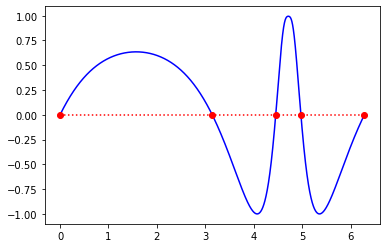

Segue il grafico di g in [0,2π]:


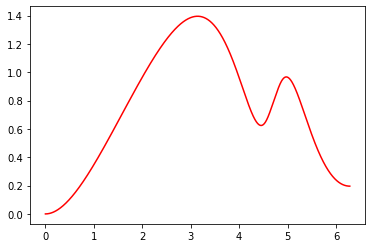

In [12]:
index = np.linspace(0, 6.29, 60, False)       #gli elementi di 'index' distano a due a due 6.29/60
K=[]

for dx in index:                              #genero K aggiungendovi gli zeri di f cercati in ogni sottointervallo
    K+=Z(dx, dx + 6.29/60,eps)                #di [0,2π]

print('La sequenza degli zeri di f in [0,2π] è:',K,'\n')


X=np.linspace(0,2*np.pi,N)
print('Segue il grafico di f in [0,2π]:')
plt.plot(X,f(X),'blue')
plt.plot(K,f(K),'o:',color='red')
plt.show()
print('Segue il grafico di g in [0,2π]:')
z=plt.plot(X,g(X),'red')
plt.show()